# Proyecto 2. Entrega 1: Modelos de Regresión Lineal
### Integrantes
- Nelson García  
- Diego Linares
- Joaquin Puente
- José Mérida
- Joaquín Campos

## Análisis exploratorio

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

### Carga de Datos y Revisión General

In [143]:
# estaremos definiendo ambos csvs para poder tener acceso a ambos pero usaremos el train y luego sobre el test replicaremos una vez se considere importante

# Definir NA como nuestros NaN
dftrain = pd.read_csv("train.csv", na_values=["NA"])

# incluimos en el analissi exploratorio lo basico para poder tenerlo a la mano
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
# datos estadísticos básicos
dftrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [145]:
# tipos
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [146]:
# Revisamos posibles variables redundantes entre sí mismas
print(dftrain.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


### Separación de Columnas por Tipo de Variable
Algunas columnas cómo MSSubClass son categóricas nominales y cuentan con valores numéricos, además algunas otras columnas cómo pueden ser las de clasificación de estado son ordinales y tienen un encoding categórico (ej. Ex - Excelente en ExterCond). Es importante que clasifiquemos las diferentes variables para poder llevar a cabo el encoding de manera correcta y realizar nuestro análisis exploratorio. Tenemos 3 categorías:

- Ordinales
- Nominales
- Numéricas

Este proceso se lleva a cabo antes de depurar las columnas que no se utilizarán en el procesamiento de datos para evitar la necesidad de mantener en mente las columnas eliminadas al categorizar.

In [147]:
col_ordinales = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                 'BsmtExposure', 'HeatingQC',  'GarageQual', 'GarageCond', 'FireplaceQu',  'Functional',
                 'KitchenQual', 'PoolQC', 'Fence']
col_nominales = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
                 'GarageFinish','GarageType','PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
col_numericas = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

Definimos una función para retornar el tipo de variable de cada columna

In [148]:
def get_type(col):
  if col in col_numericas + ['SalePrice']:
    return 'numerica'
  elif col in col_nominales:
    return 'nominal'
  elif col in col_ordinales:
    return 'ordinal'

Verificamos que todas las columnas se hayan ingresado correctamente

In [149]:
unassigned = []
for col in dftrain.columns:
  if get_type(col) == None:
    unassigned.append(col)

print(unassigned)

['Id']


### Datos Faltantes
En este paso vamos a analizar datos faltantes

Primero verificamos las columnas con valores nulos, para tener una mejor idea de que necesitamos hacer

In [150]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64


Nos damos cuenta que PoolQC tiene 99.5% de valores faltantes, ¿Por qué?

Algunas de las variables categóricas tienen cómo categoría "NA" y se toma como valor nulo al cargar los datos al DF. Creamos una lista con las variables que cuentan con esta característica

In [151]:
na_as_data_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'MiscFeature',
                   'MasVnrType', 'GarageQual', 'GarageCond']

dftrain[na_as_data_cols] = dftrain[na_as_data_cols].fillna('Missing')

Revisando nuevamente las columnas con valores nulos

In [152]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
                  ...    
ExterQual        0.000000
MasVnrType       0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
SalePrice        0.000000
Length: 81, dtype: float64


Ahora tenemos valores faltantes más manejables, primero vamos a tomar LotFrontage y GarageYrBlt y reemplazar los valores faltantes con la mediana. Esto debido a que el 17.73% y 5.54% siguen siendo cifras bastante significativas y no podemos simplemente eliminar estas filas.

In [153]:
cols_to_fill = ['LotFrontage', 'GarageYrBlt']

medians = dftrain[cols_to_fill].median()

dftrain[cols_to_fill] = dftrain[cols_to_fill].fillna(medians)

Revisando nuevamente los valores nulos

In [154]:
missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

MasVnrArea      0.547945
Electrical      0.068493
GarageFinish    0.000000
GarageType      0.000000
FireplaceQu     0.000000
                  ...   
MasVnrType      0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64


Ahora con una pequeña cantidad de valores faltantes, podemos simplemente remover las filas que los contengan.

In [155]:
dftrain = dftrain.dropna()

missing_values = dftrain.isnull().sum() / len(dftrain) * 100
print(missing_values.sort_values(ascending=False))

Id             0.0
CentralAir     0.0
GarageYrBlt    0.0
GarageType     0.0
FireplaceQu    0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 81, dtype: float64


Ya no tenemos valores faltantes dentro de nuestro DF

### Encoding de Variables Categóricas
En este paso vamos a codificar las variables categóricas, las ordinales utilizando OrdinalEncoder y las nominales utilizando get_dummies. De esta manera podemos utilizar las variables ordinales cómo numéricas y aplicar las nominales a nuestro análisis.

Identificamos los diferentes valores que puedan tomar las variables dentro del dataset

In [156]:
for col in col_ordinales:
    print(f"{col}: {dftrain[col].unique()}")

OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond: [5 8 6 7 4 2 3 9 1]
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual: ['Gd' 'TA' 'Ex' 'Missing' 'Fa']
BsmtCond: ['TA' 'Gd' 'Missing' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'Missing']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
GarageQual: ['TA' 'Fa' 'Gd' 'Missing' 'Ex' 'Po']
GarageCond: ['TA' 'Fa' 'Missing' 'Gd' 'Po' 'Ex']
FireplaceQu: ['Missing' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
PoolQC: ['Missing' 'Ex' 'Fa' 'Gd']
Fence: ['Missing' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


Aplicamos el encoding

In [157]:
# Diferentes categorías para las diferentes columnas
standard_categories = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing']
fence_categories = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'Missing']
bsmt_exposure_categories = ['No', 'Mn', 'Av', 'Gd', 'Missing']
functional_categories = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Missing']

cleaned_ordinales = [x for x in col_ordinales if x not in ['OverallQual', 'OverallCond']]

# Limpiamos los entries quitando posibles errores de espacios
dftrain[cleaned_ordinales] = dftrain[cleaned_ordinales].astype(str).apply(lambda x: x.str.strip())

# Asignación de categorías a columnas
categories = []
for col in cleaned_ordinales:
    if col == 'Fence':
        categories.append(fence_categories)
    elif col == 'BsmtExposure':
        categories.append(bsmt_exposure_categories)
    elif col == 'Functional':
        categories.append(functional_categories)
    else:
        categories.append(standard_categories)

# Inicialización y aplicación de encoder
encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
dftrain[cleaned_ordinales] = encoder.fit_transform(dftrain[cleaned_ordinales]).astype(int)

# Verificacion de filas sin encodear
print((dftrain[cleaned_ordinales] == -1).sum())

# Conteo de valores por cada columna
for col in cleaned_ordinales:
    print(f"{col}:")
    print("\n".join([f"{val} - {count}" for val, count in dftrain[col].value_counts().items()]))
    print()


ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
HeatingQC       0
GarageQual      0
GarageCond      0
FireplaceQu     0
Functional      0
KitchenQual     0
PoolQC          0
Fence           0
dtype: int64
ExterQual:
2 - 905
1 - 481
0 - 51
3 - 14

ExterCond:
2 - 1273
1 - 146
3 - 28
0 - 3
4 - 1

BsmtQual:
2 - 648
1 - 611
0 - 120
5 - 37
3 - 35

BsmtCond:
2 - 1303
1 - 64
3 - 45
5 - 37
4 - 2

BsmtExposure:
0 - 945
2 - 221
3 - 133
1 - 114
4 - 38

HeatingQC:
0 - 734
2 - 427
1 - 240
3 - 49
4 - 1

GarageQual:
2 - 1302
5 - 81
3 - 48
1 - 14
0 - 3
4 - 3

GarageCond:
2 - 1317
5 - 81
3 - 35
1 - 9
4 - 7
0 - 2

FireplaceQu:
5 - 685
1 - 378
2 - 311
3 - 33
0 - 24
4 - 20

Functional:
0 - 1352
2 - 34
1 - 31
3 - 15
4 - 13
5 - 5
6 - 1

KitchenQual:
2 - 734
1 - 579
0 - 99
3 - 39

PoolQC:
5 - 1444
1 - 3
0 - 2
3 - 2

Fence:
4 - 1170
1 - 157
0 - 59
2 - 54
3 - 11



<ipython-input-157-d6c072b0ab8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain[cleaned_ordinales] = dftrain[cleaned_ordinales].astype(str).apply(lambda x: x.str.strip())
<ipython-input-157-d6c072b0ab8c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain[cleaned_ordinales] = encoder.fit_transform(dftrain[cleaned_ordinales]).astype(int)


Para las variables nominales, utilizamos get_dummies.

In [158]:
dftrain = pd.get_dummies(dftrain, columns=col_nominales, prefix_sep='_')
dftrain

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice,MSSubClass_20,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,1,2,1,2,0,706,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,1,8,0,0,5,2003.0,2,548,2,2,0,61,0,0,0,0,5,4,0,2008,208500,False,...,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,2,80.0,9600,6,8,1976,1976,0.0,2,2,1,2,3,978,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,2,6,0,1,2,1976.0,2,460,2,2,298,0,0,0,0,0,5,4,0,2007,181500,True,...,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3,68.0,11250,7,5,2001,2002,162.0,1,2,1,2,1,486,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,1,6,0,1,2,2001.0,2,608,2,2,0,42,0,0,0,0,5,4,0,2008,223500,False,...,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,4,60.0,9550,7,5,1915,1970,0.0,2,2,2,1,0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,1,7,0,1,1,1998.0,3,642,2,2,0,35,272,0,0,0,5,4,0,2006,140000,False,...,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,5,84.0,14260,8,5,2000,2000,350.0,1,2,1,2,2,655,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,0,1,2,2000.0,3,836,2,2,192,84,0,0,0,0,5,4,0,2008,250000,False,...,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,2,2,1,2,0,0,0,953,95

Con el output podemos observar que ya se encuentran codificadas nuestras variables categóricas ordinales utilizando valores numéricos.

### Depuración de Datos
En este paso revisamos si existen datos duplicados

Eliminación de Filas Duplicadas

In [159]:
before = dftrain.shape[0]

# Eliminar duplicados
dftrain = dftrain.drop_duplicates()
after = dftrain.shape[0]
print(f"Filas eliminadas: {before - after}")

Filas eliminadas: 0


No existen filas duplicadas.

### Exploración Variable de Respuesta
En este paso buscamos obtener más información sobre la variable respuesta, ya que nuestro interés es buscar predecirla.

¿Cómo se distribuye?

[Text(0.5, 1.0, 'Distribucion de SalePrice'),
 Text(0.5, 0, 'Precio de Venta'),
 Text(0, 0.5, 'Cantidad de Casas')]

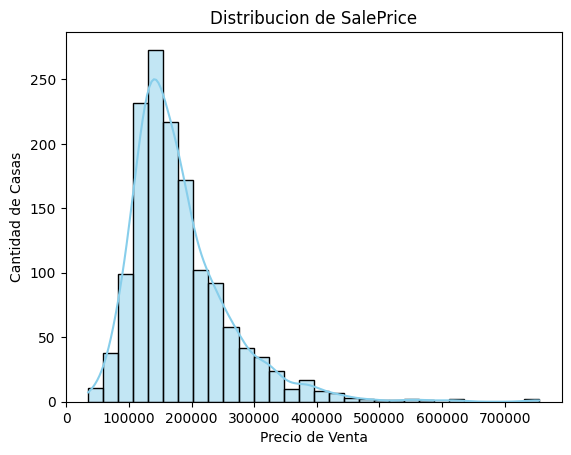

In [160]:
sns.histplot(dftrain['SalePrice'], kde=True, color='skyblue', bins=30).set(title='Distribucion de SalePrice', xlabel='Precio de Venta', ylabel='Cantidad de Casas')

La variable SalePrice sigue una distribución cerca de la normal, con un sesgo hacia la derecha. Esto quiere decir que hay más casas con precios bajos a medios y pocas con precios muy altos. A parte del análisis gráfico, podemos obtener algunos datos adicionales

In [161]:
print(dftrain['SalePrice'].describe())
print("Skewness:", dftrain['SalePrice'].skew())

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8831110462405252


¿Cuáles variables se correlacionan con la variable objetivo?

In [162]:
# cuántas categorías únicas hay por columna?
print(dftrain.select_dtypes(include=['object']).nunique())

print("Distribucion de categorias por columna: ")
# Distribución de categorías por columna
for col in dftrain.select_dtypes(include=['object']).columns:
    print(dftrain[col].value_counts())

Series([], dtype: float64)
Distribucion de categorias por columna: 


Gracias a este output podemos "observar" de forma rápida, que algunas de las variables como utilities, un poco LandSlope, Condition2 y tal vez otras variables pueden ser eliminadas, pero necesitamos poder justificar, de esta forma igual ya nos podemos hacer una idea de como hay algunas variables que tienen poca relevancia.

### Exploración Variables Categóricas Ordinales
En este paso buscamos obtener más información sobre las variables categóricas ordinales, buscando identificar cómo se distribuyen y que nos dicen sobre las casas del dataset

### Exploración Variables Categóricas Nominales

### Exploracion Variables Numéricas

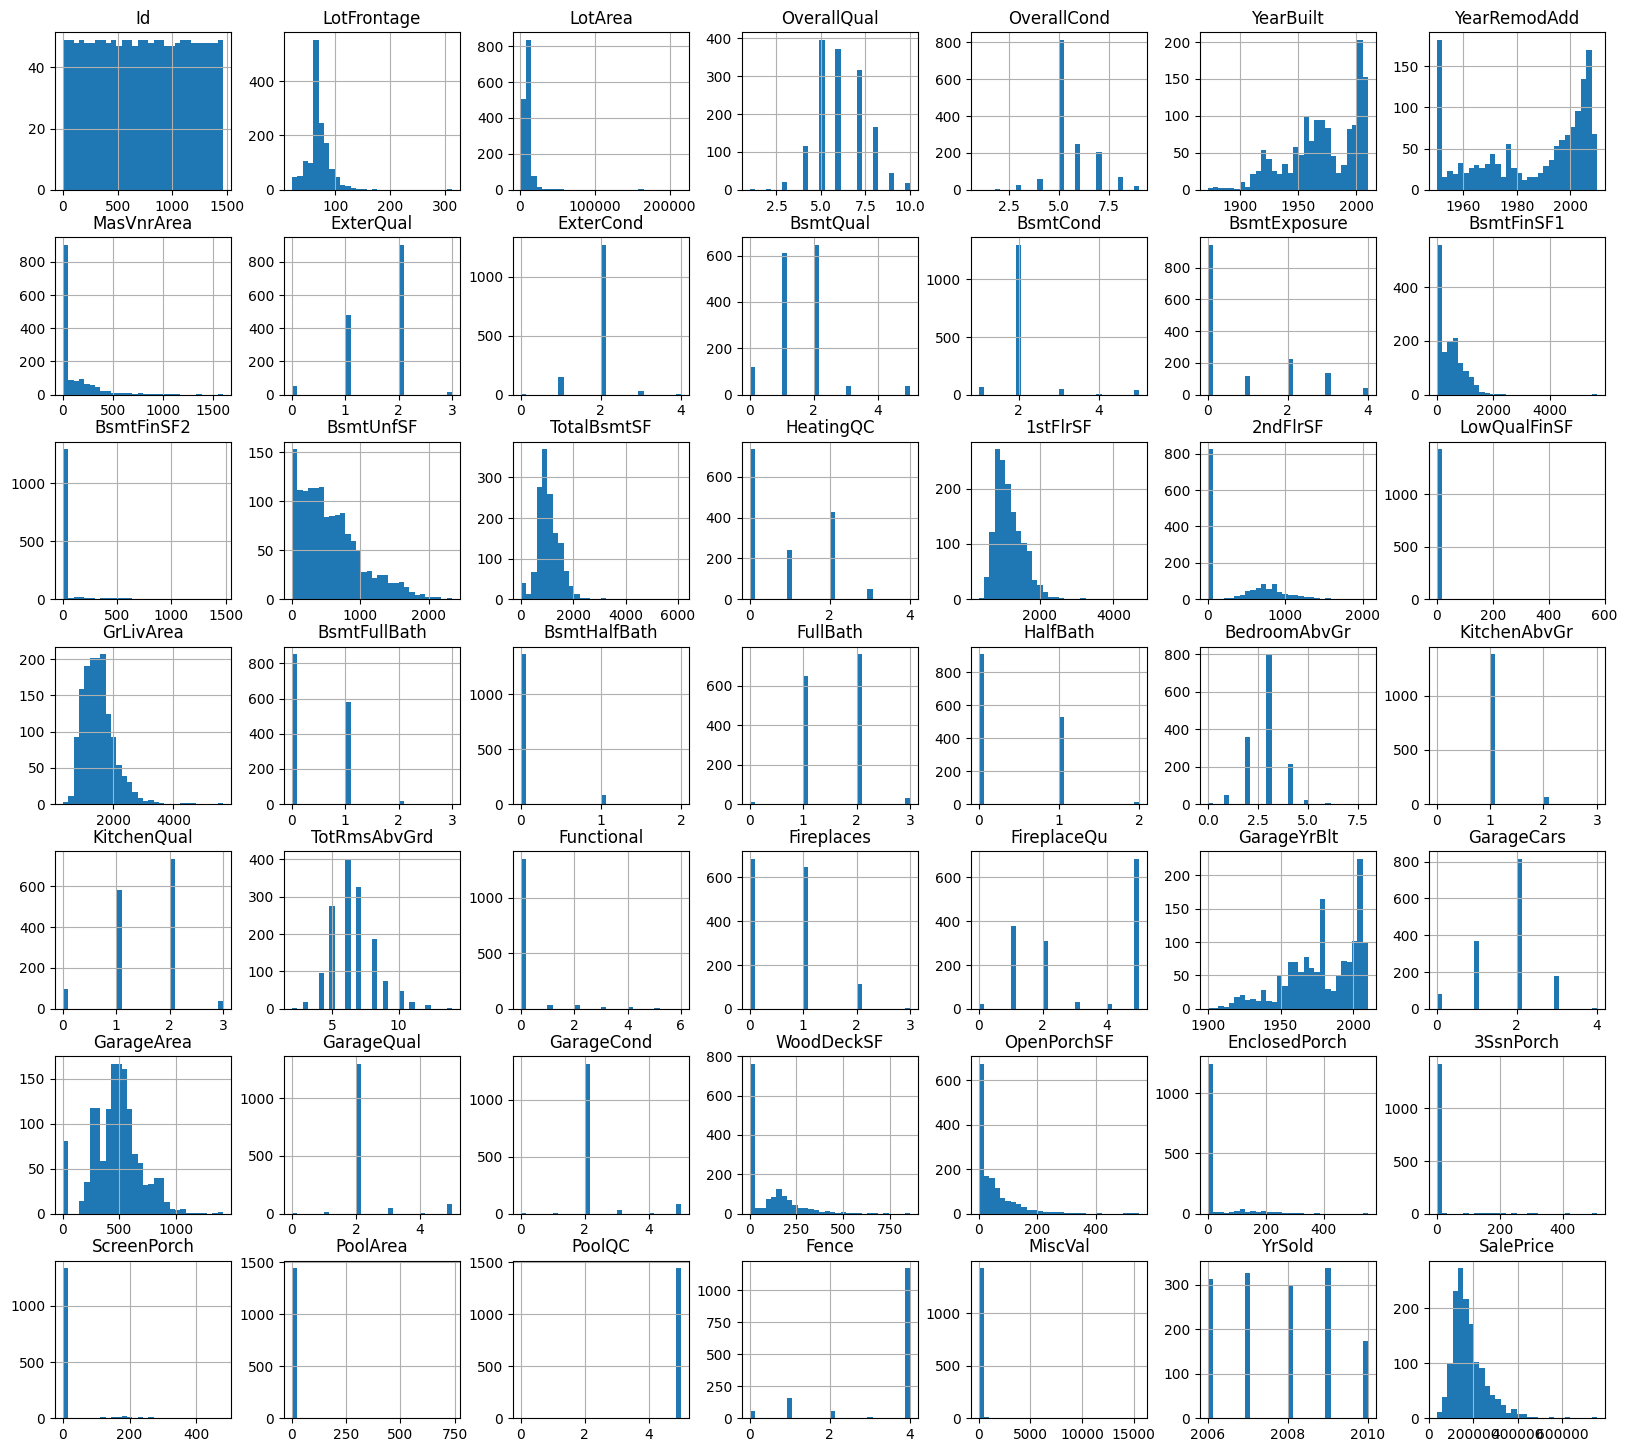

In [163]:
# Visualizacion y observacion variables numericas
dftrain.hist(figsize=(20, 18), bins=30)
plt.show()

Gracias a esto podemos imaginar que hay bastantes variables con nulas, o como wooddeckSF en donde parece que la varianza es baja podemos identificar tambien que ademas hay bastantes varaibles que pueden sernos de gran utilidad en la busqueda de salesPrice pero sobre todo variables que tienden a una moda y como estas distribuciones que podriamos usar.

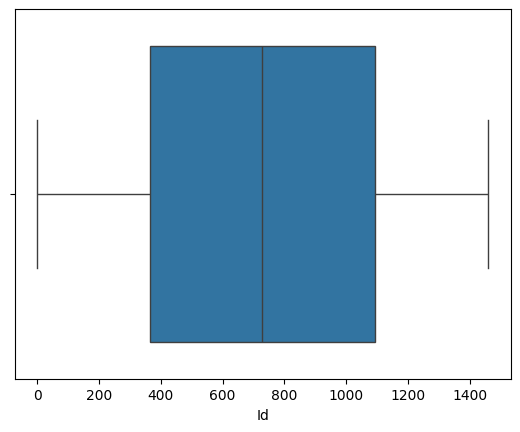

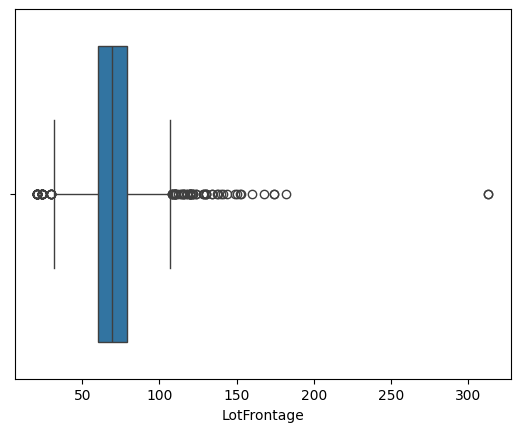

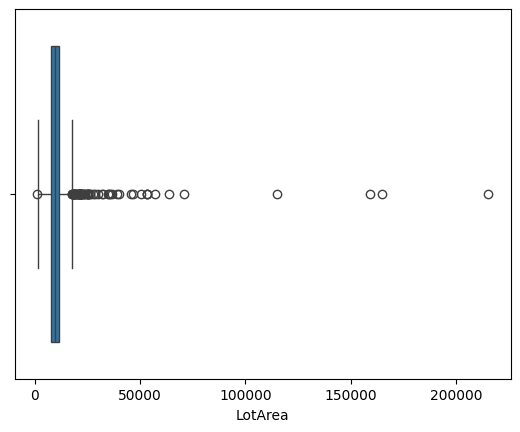

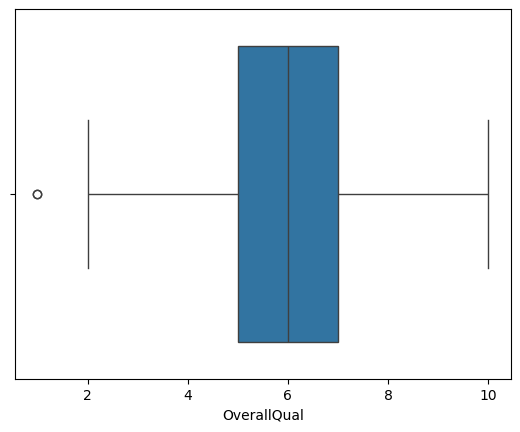

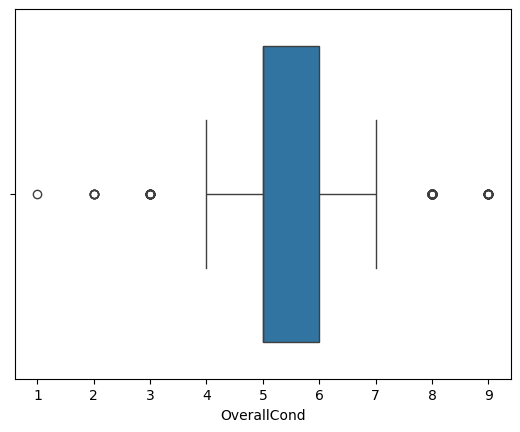

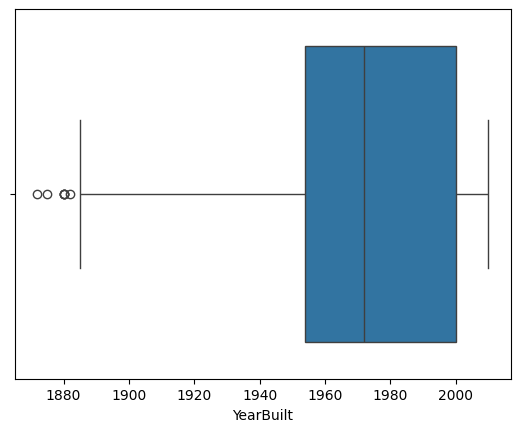

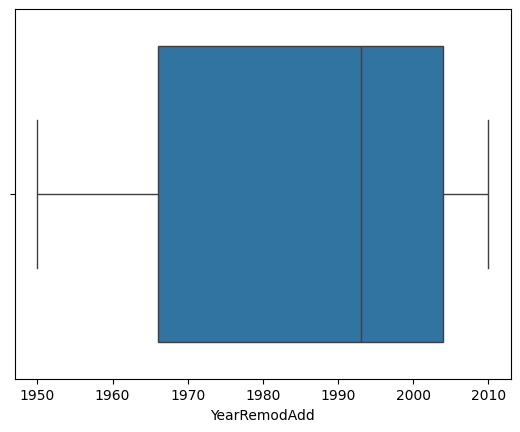

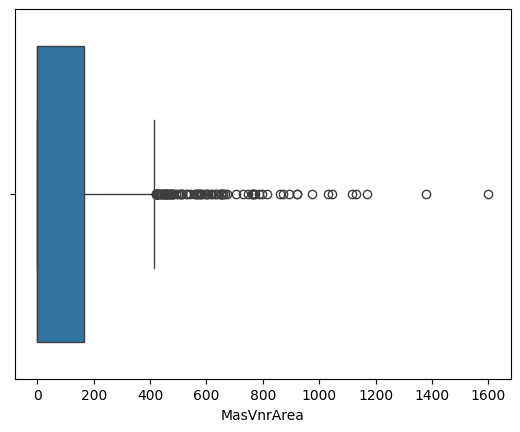

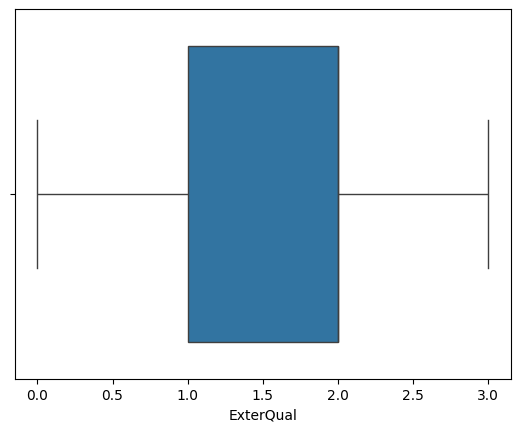

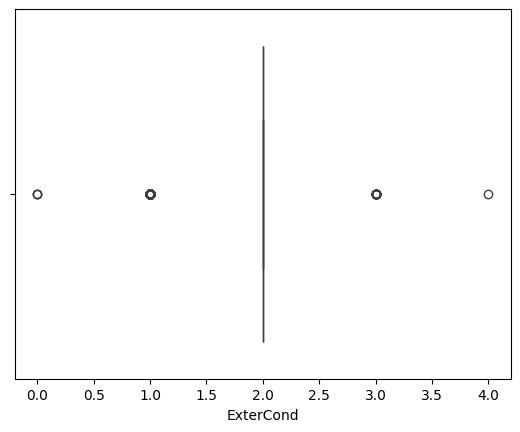

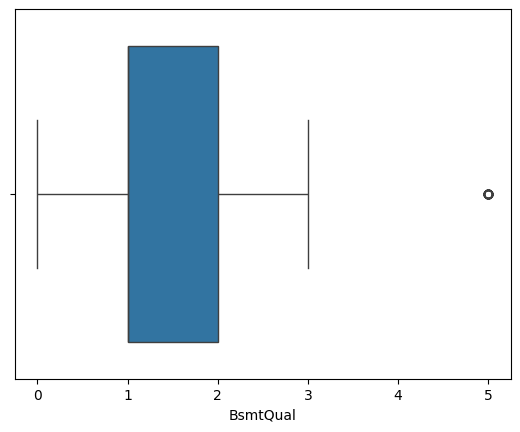

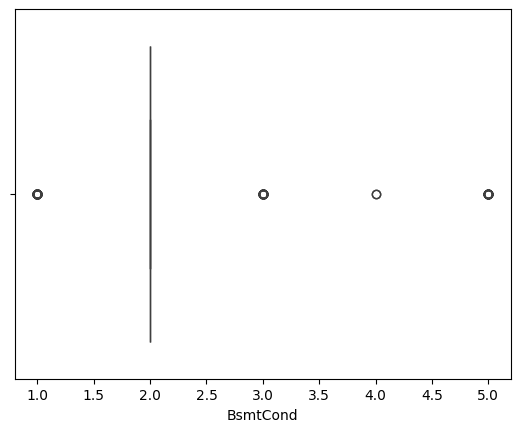

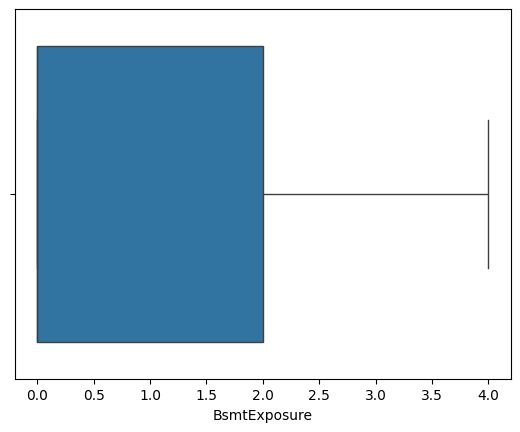

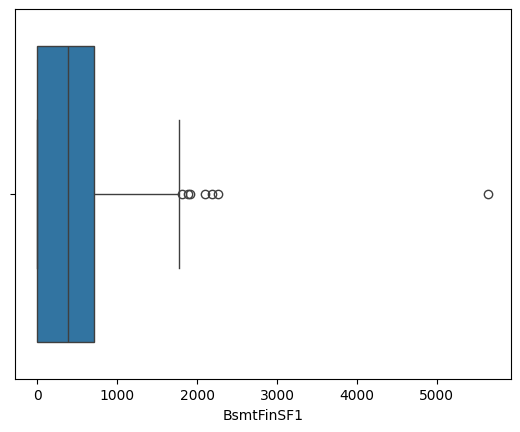

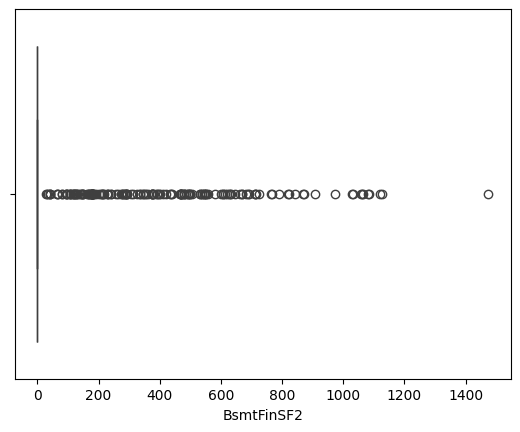

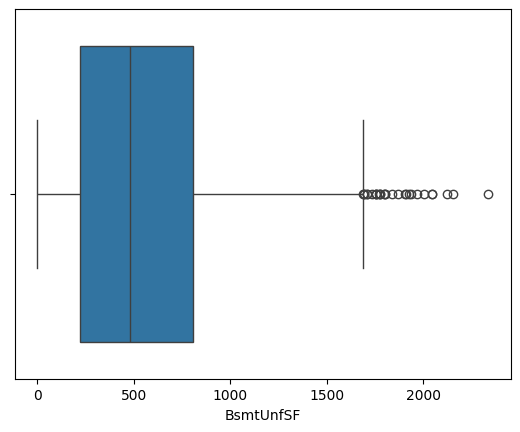

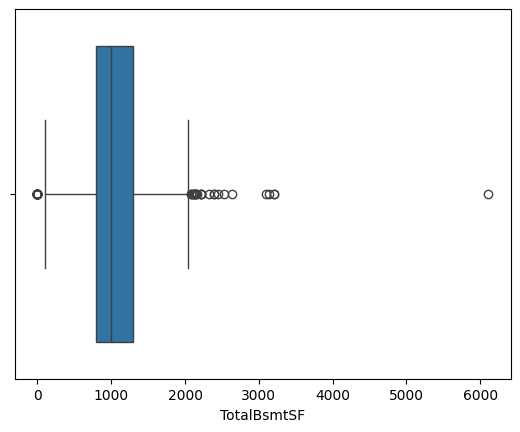

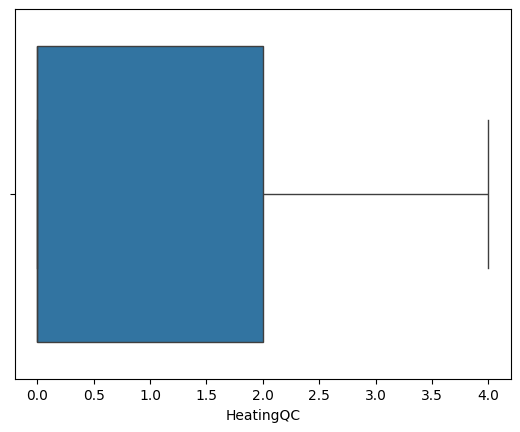

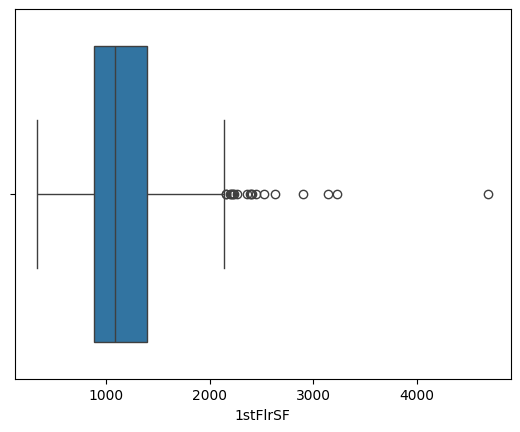

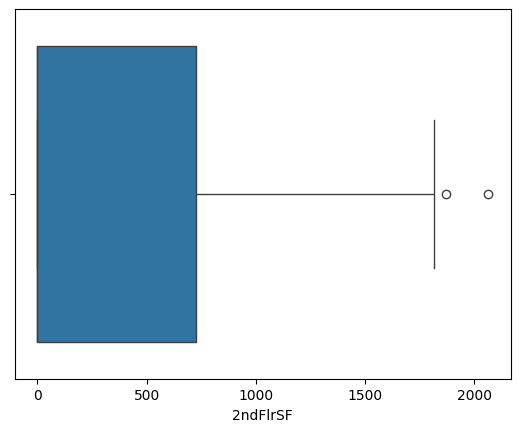

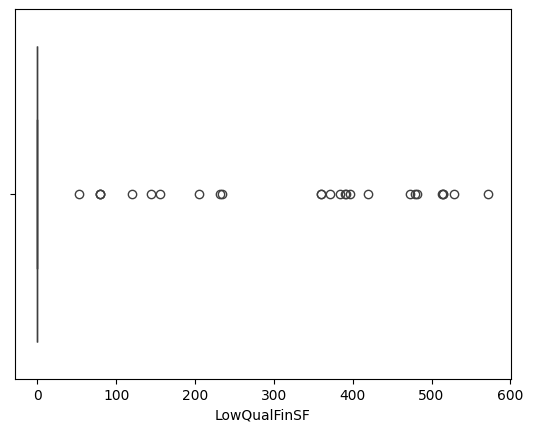

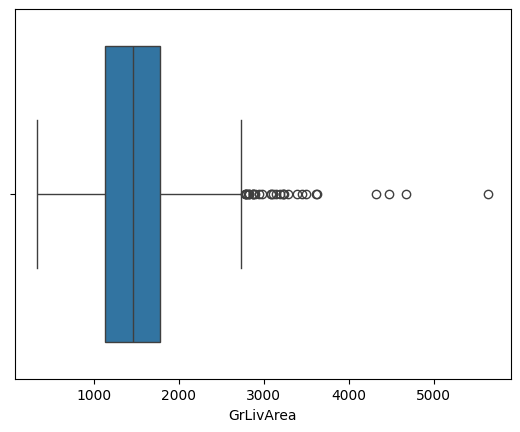

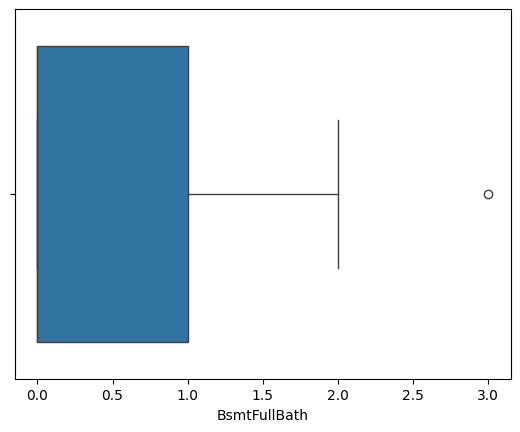

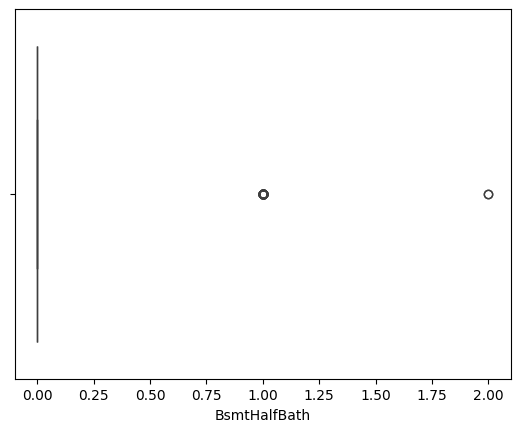

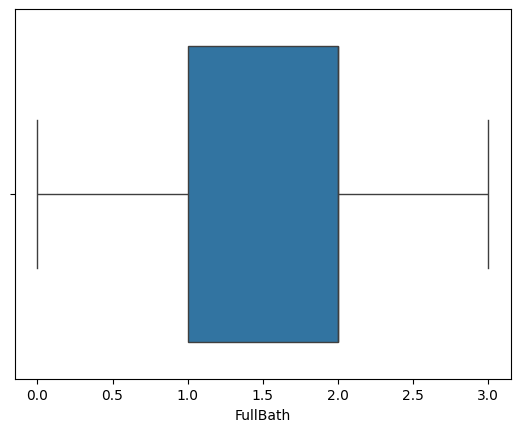

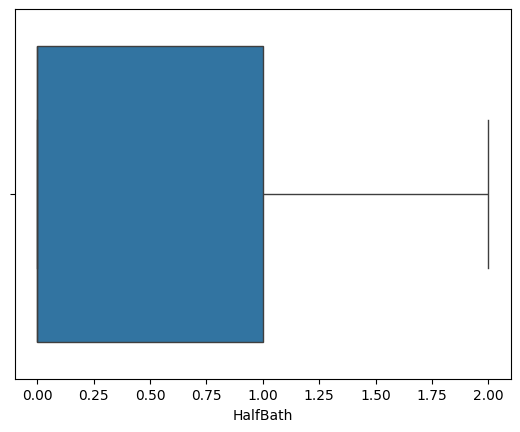

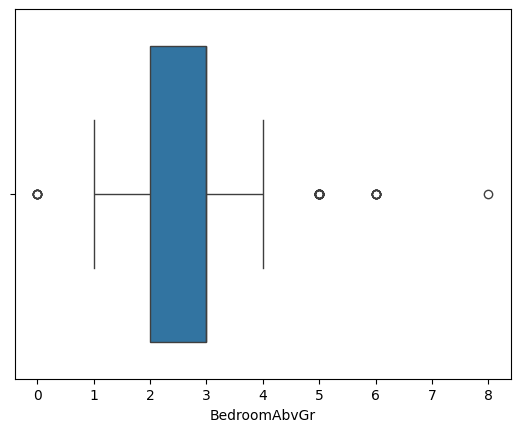

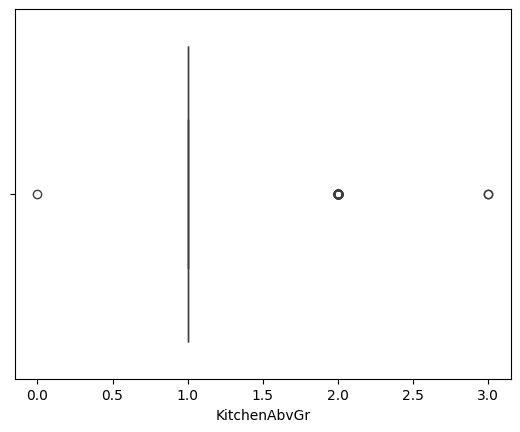

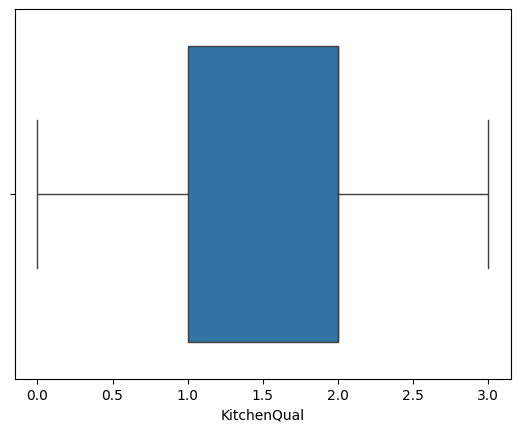

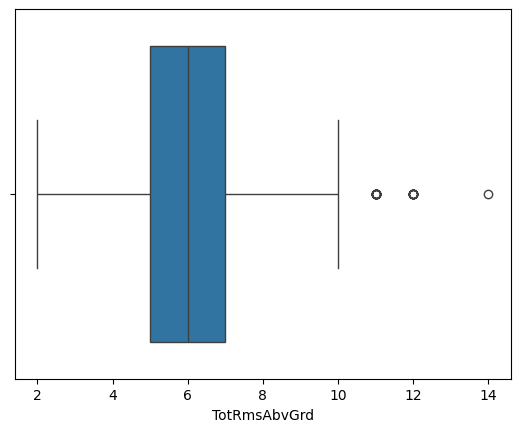

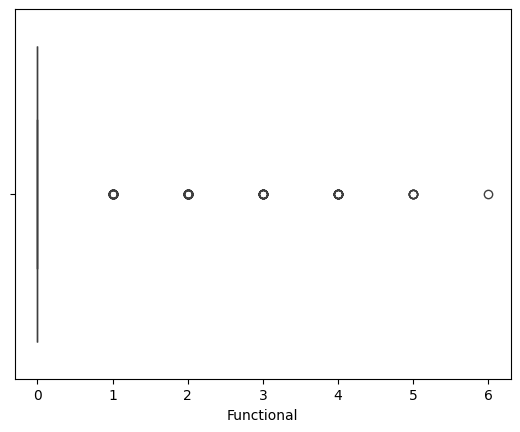

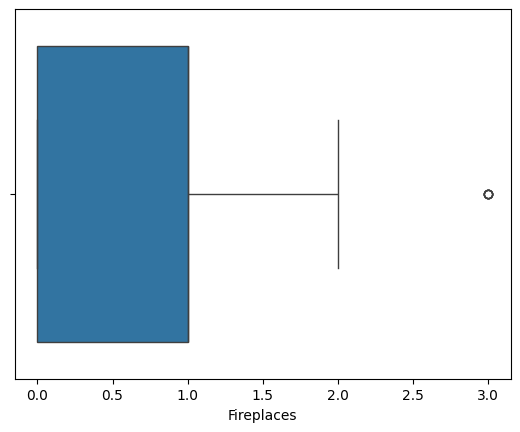

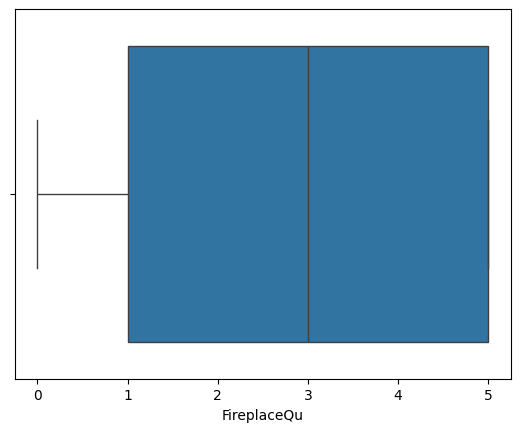

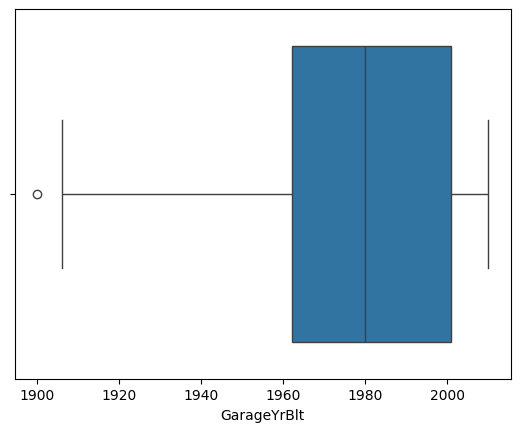

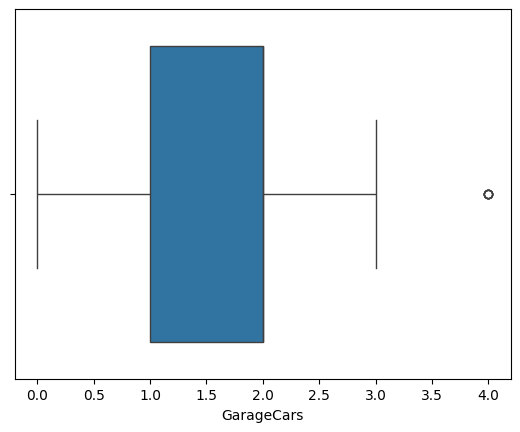

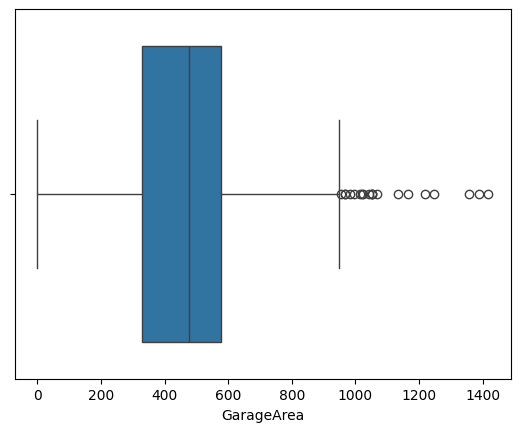

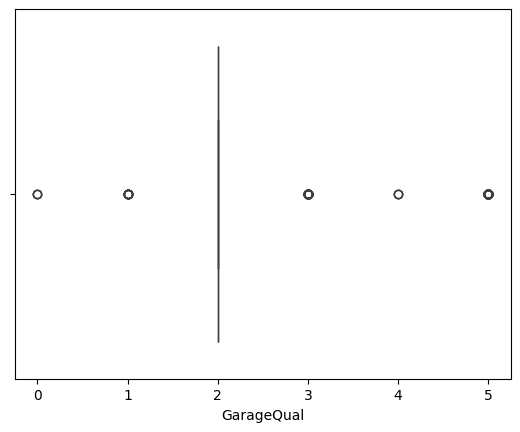

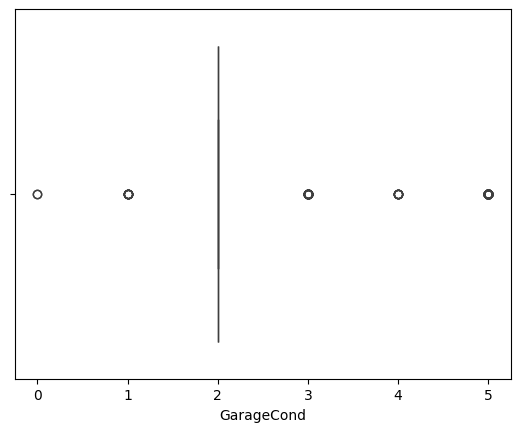

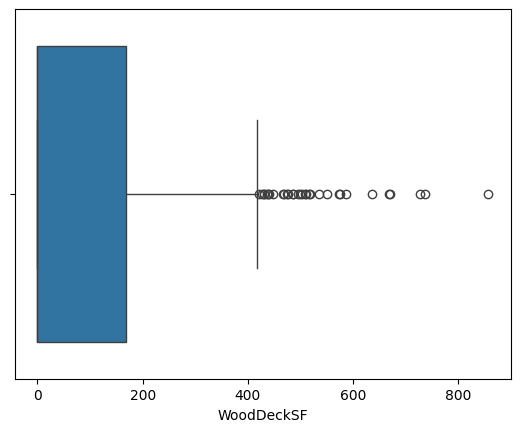

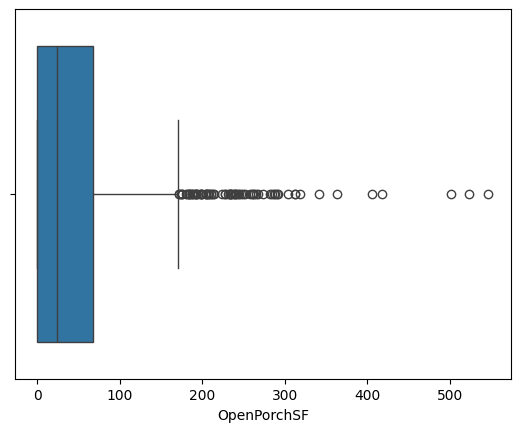

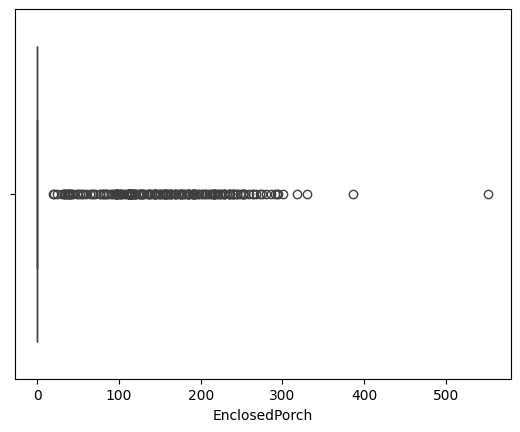

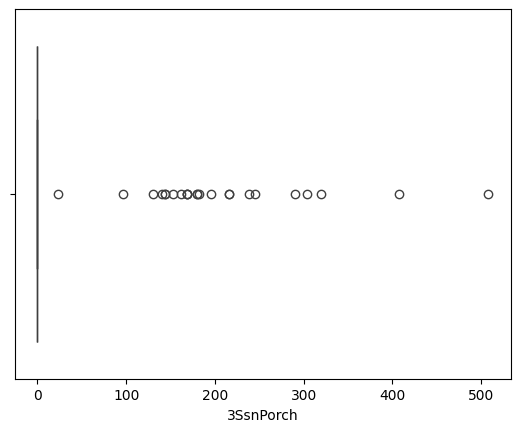

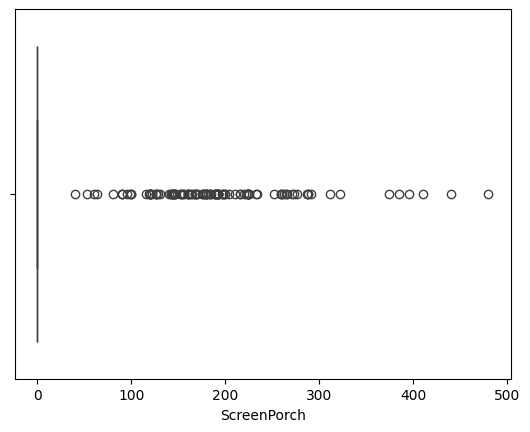

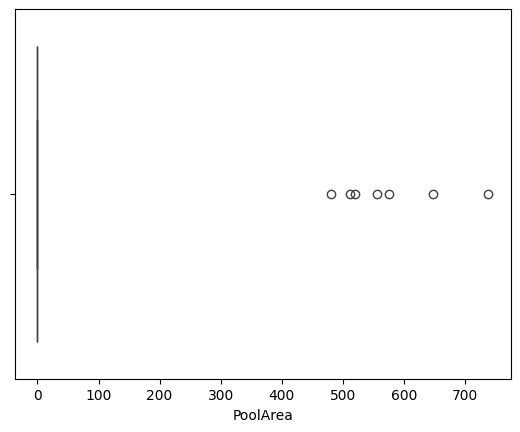

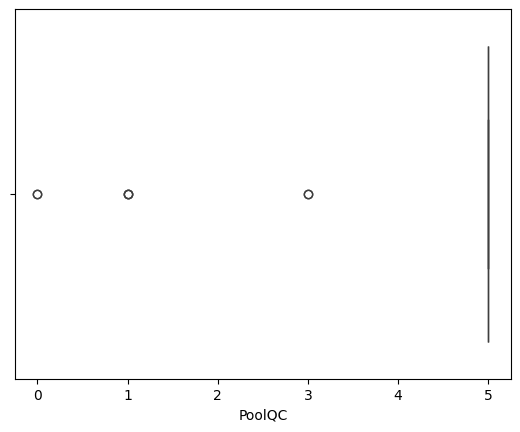

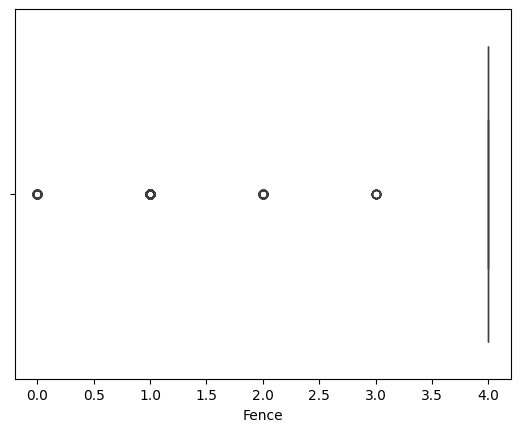

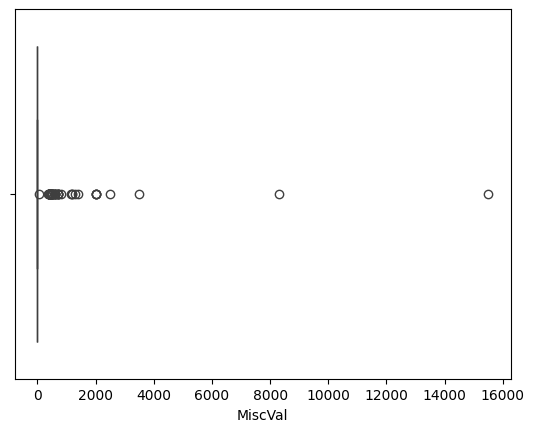

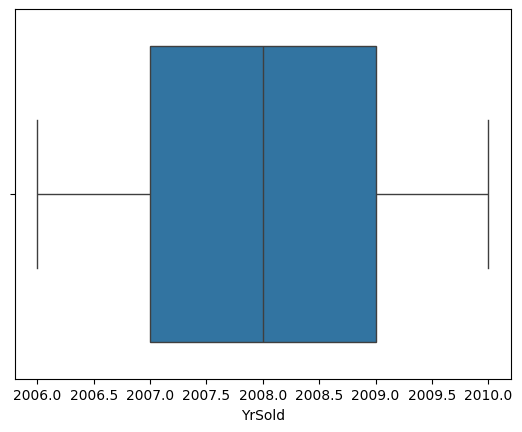

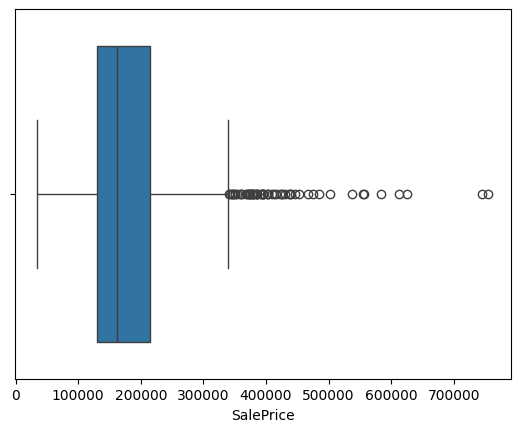

In [164]:
# Boxplots para detectar outliers
for col in dftrain.select_dtypes(include=['number']).columns:
    sns.boxplot(x=dftrain[col])
    plt.show()

En base a esto podemos definir que algunas variables tienen valores atipicos, no obstante deberiamos de evaluar primero las variables para ver si son necesarias

### """importante"""
#### que al no ser expertos gracias a la correlacion podemos definir que el precio esta realacionado altamente con: OverallQual y GrLivArea de manera que podemos usar esto para poder ayudarnos

Segun esto podemos ver que la correlacion entre las variables númericas pero aún asi no podemos descartar ninguna variable porque la correlacion no tienen numeros altos para poder eliminarla con justificacion.

## Análisis de Relaciones

### Matriz de Correlación

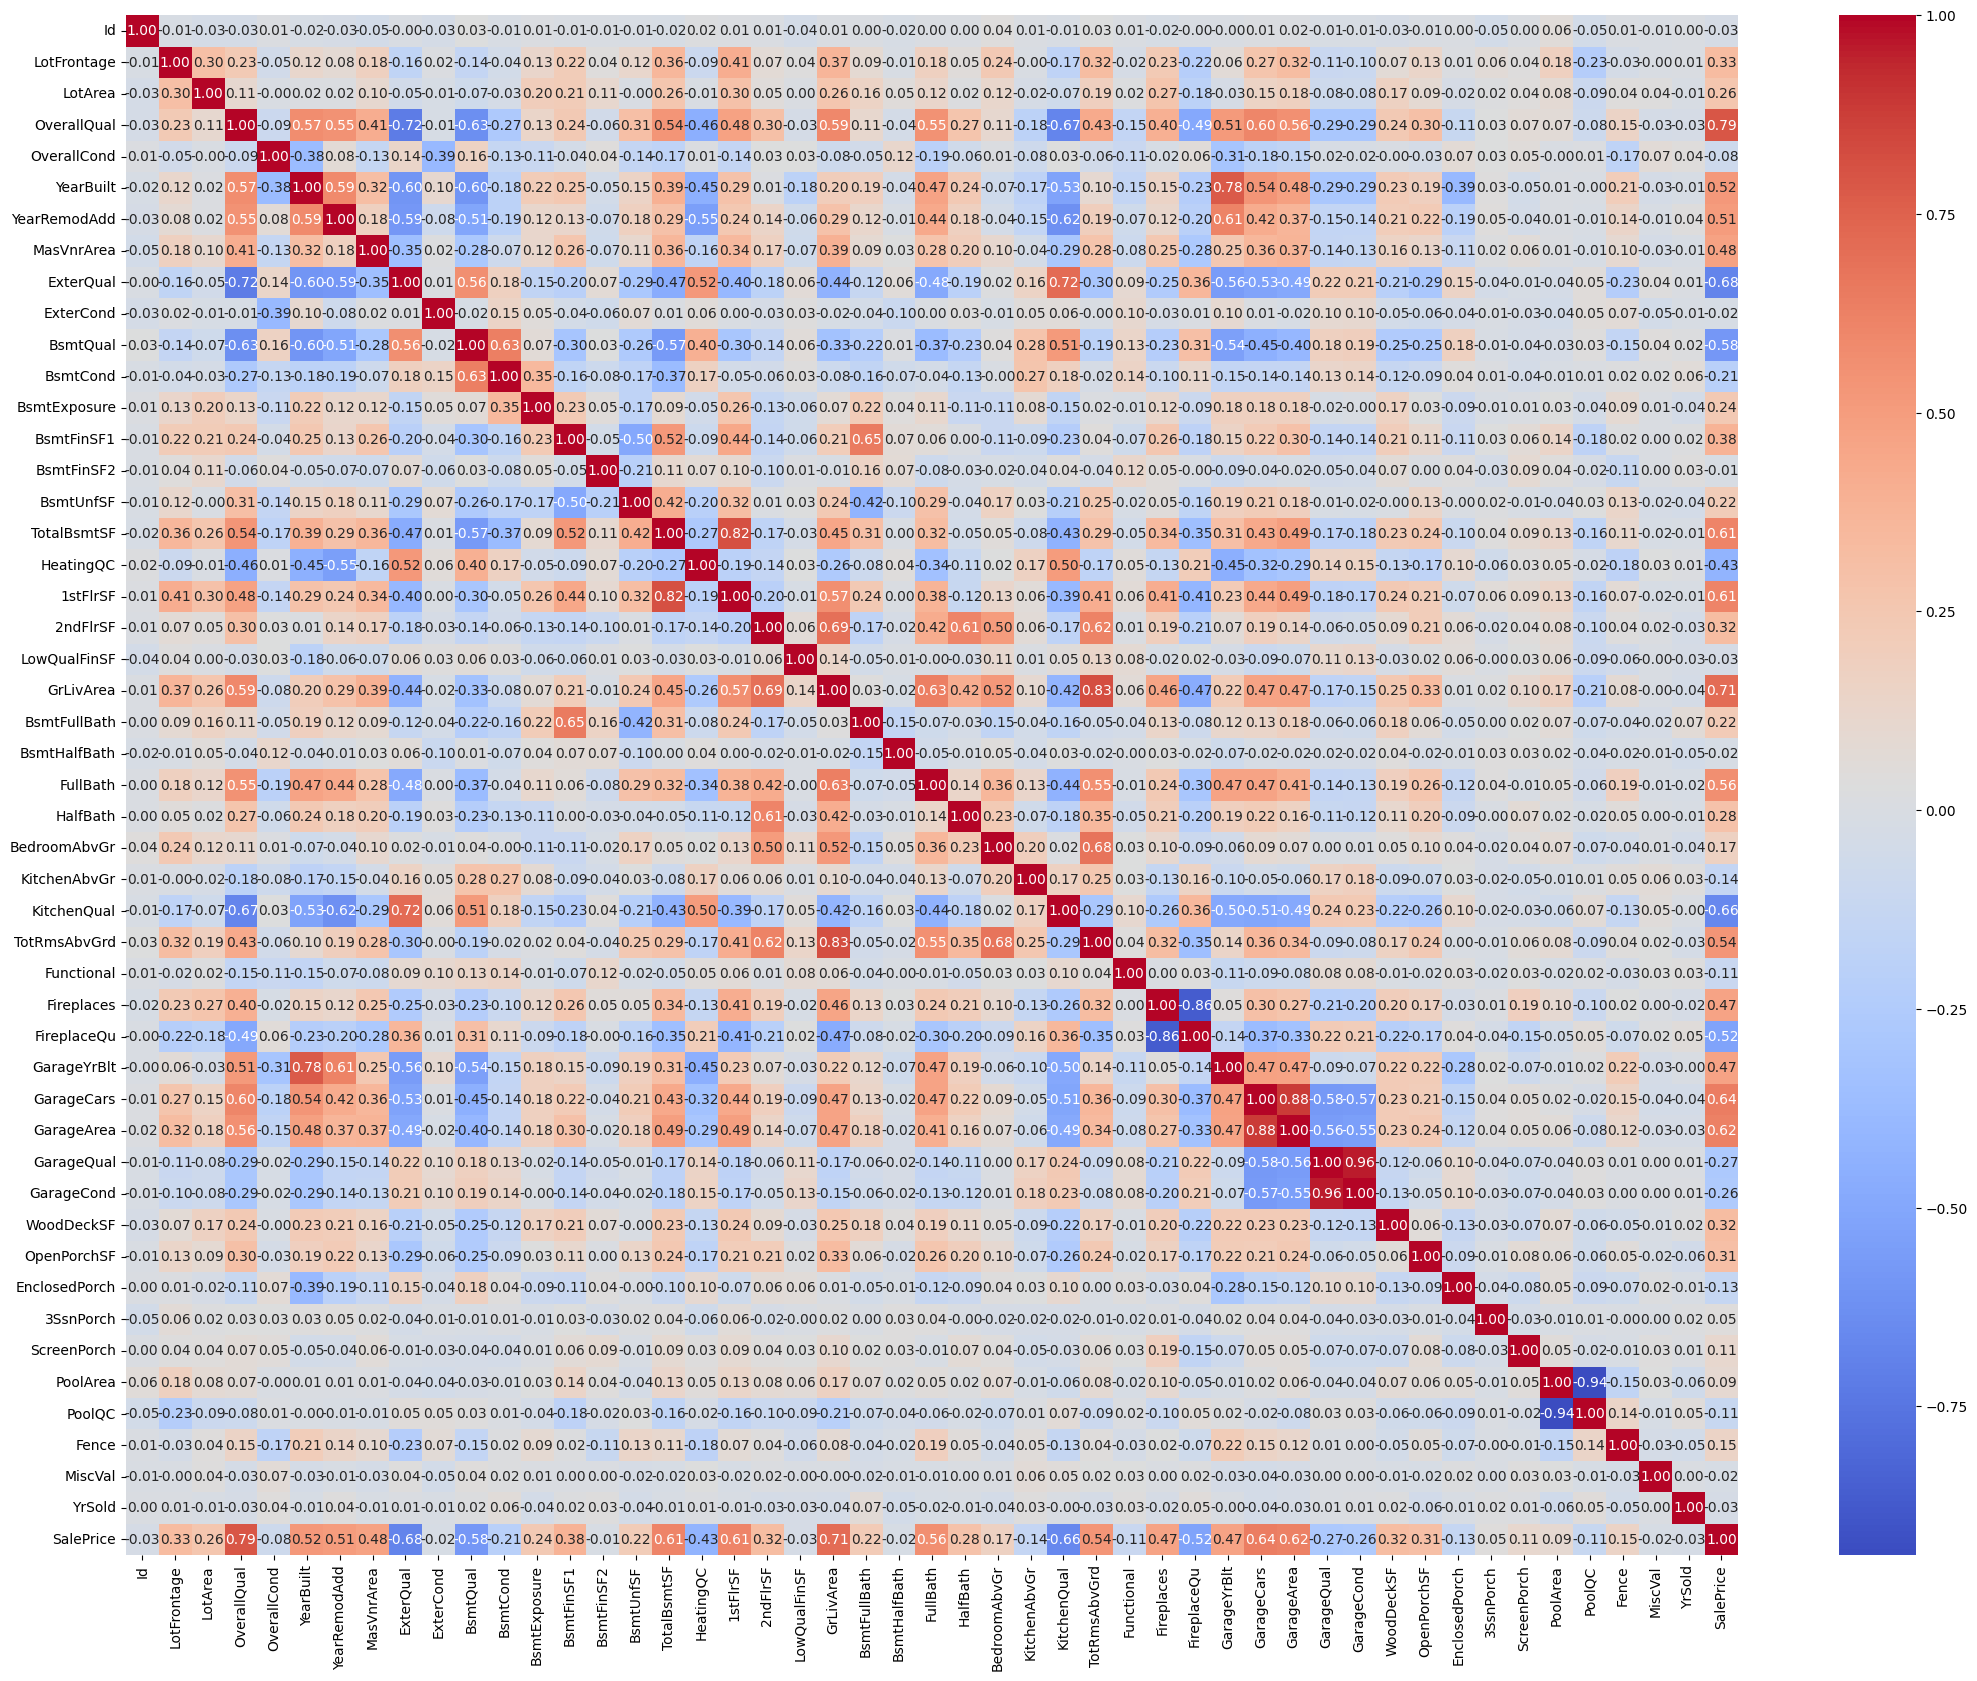

In [165]:
plt.figure(figsize=(26, 20))
df_numeric = dftrain.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### Variables Predictoras
En este paso buscamos encontrar las variables que se relacionan más cercanamente con SalePrice

In [169]:
cols = col_numericas.copy()
cols.extend(col_ordinales)
cols.append('SalePrice')
corr = dftrain[cols].corr()['SalePrice'].drop('SalePrice')

corr_list = sorted(corr.items(), key=lambda x: x[1], reverse=True)
for x in corr_list:
  print(x)

('OverallQual', 0.7900849201373091)
('OverallQual', 0.7900849201373091)
('GrLivArea', 0.7100731003397663)
('GarageCars', 0.6397492861021664)
('GarageArea', 0.6224835657300107)
('TotalBsmtSF', 0.6132992899680303)
('1stFlrSF', 0.6069686642164591)
('FullBath', 0.562709833097775)
('TotRmsAbvGrd', 0.536366089790717)
('YearBuilt', 0.5232737996488445)
('YearRemodAdd', 0.5074880521898558)
('MasVnrArea', 0.4774862196759675)
('Fireplaces', 0.46897260312131045)
('GarageYrBlt', 0.4666143388717628)
('BsmtFinSF1', 0.3839946088853101)
('LotFrontage', 0.3332063050587532)
('WoodDeckSF', 0.3246584901508167)
('2ndFlrSF', 0.3228396321521066)
('OpenPorchSF', 0.31124358528427976)
('HalfBath', 0.2823306040749202)
('LotArea', 0.26466822224254827)
('BsmtExposure', 0.23917470937180407)
('BsmtExposure', 0.23917470937180407)
('BsmtFullBath', 0.22498819036769954)
('BsmtUnfSF', 0.21570727511192334)
('BedroomAbvGr', 0.17195600043276543)
('Fence', 0.1459729943213169)
('Fence', 0.1459729943213169)
('ScreenPorch', 0.11

### Pairplot
Pairplot con las primeras 10 variables predictoras

## Ingeniería de Características

## Modelo Univariado

## Modelo con Todas las Variables Numéricas

# Analisis de variables categoricas.
Empezaremos viendo la cantidad o como que tantas variables distintas existen en estas columnas:

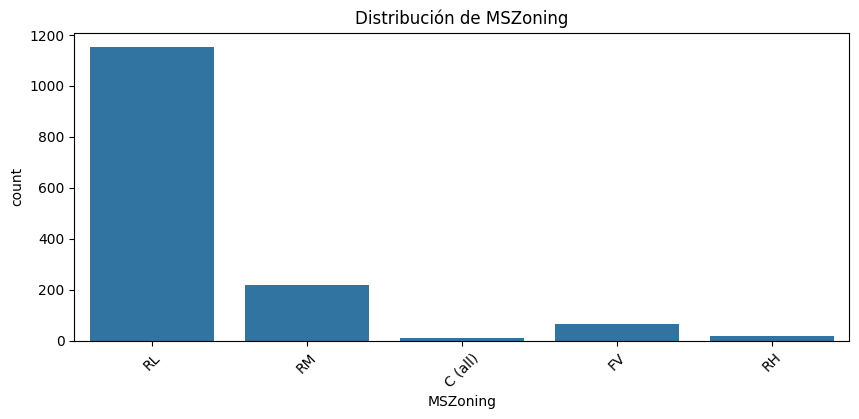

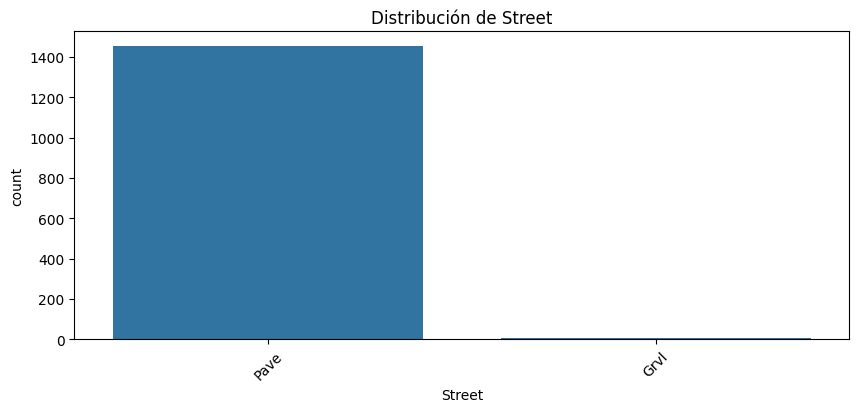

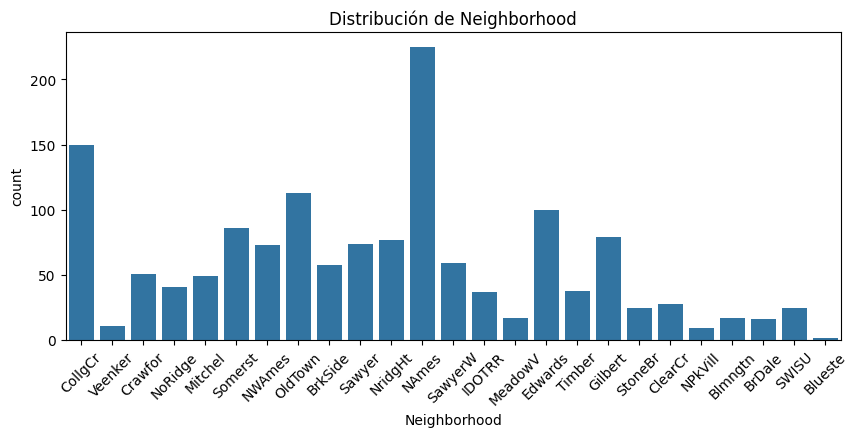

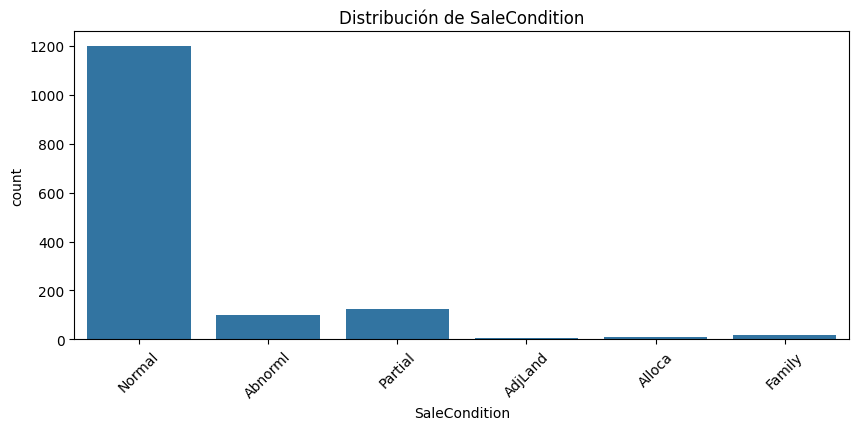

In [ ]:
# Conteo de categorías en variables clave
cat_features = ["MSZoning", "Street", "Neighborhood", "SaleCondition"]

for col in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=dftrain, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col}")
    plt.show()


### ¿Qué vecindarios tienden a ser mas "caros"?

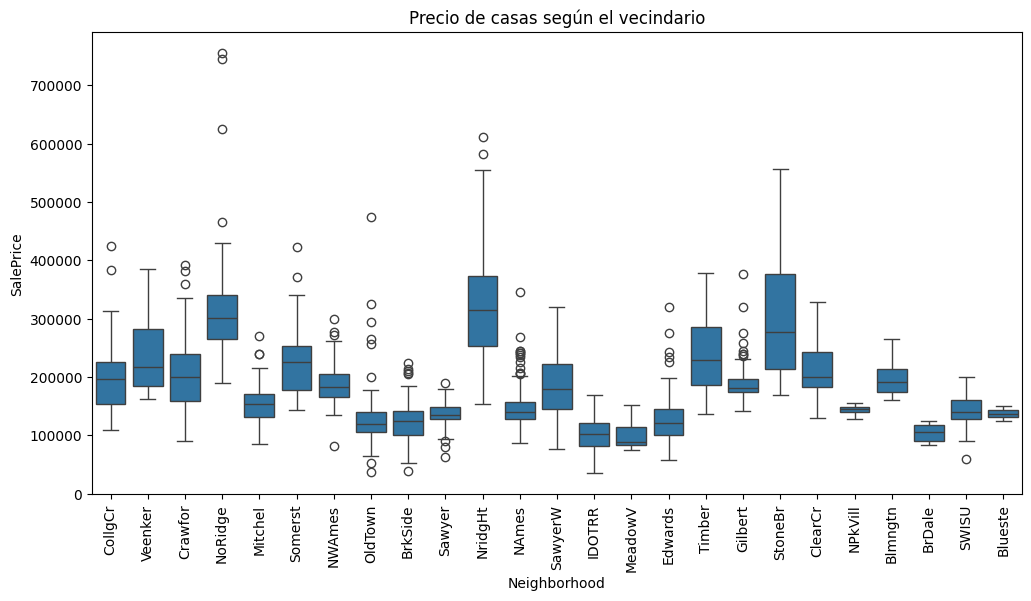

In [ ]:
# Boxplot de Neighborhood vs SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=dftrain)
plt.xticks(rotation=90)
plt.title("Precio de casas según el vecindario")
plt.show()


Usando el test podemos evaluar que hay vecindarios que son mas caros igualmente este no lo podemos usar porque en teoria no tenemos SalePrice

### ¿Qué "Vecindario" se venden las propiedades mas grandes?

In [ ]:
# Agrupar por vecindario y calcular el promedio del tamaño del terreno y área habitable
zonas_mas_grandes = dftrain.groupby("Neighborhood")[["LotArea", "GrLivArea"]].mean()

# Ordenar de mayor a menor por tamaño del terreno
zonas_mas_grandes = zonas_mas_grandes.sort_values(by="LotArea", ascending=False)
print(zonas_mas_grandes.head(10))

                   LotArea    GrLivArea
Neighborhood                           
ClearCr       30875.750000  1788.107143
Timber        23664.236842  1749.368421
Veenker       15606.000000  1539.636364
NoRidge       14218.902439  2508.853659
NWAmes        11833.630137  1727.780822
Crawfor       11809.686275  1791.607843
Mitchel       11624.285714  1294.204082
Gilbert       11379.151899  1641.316456
NridgHt       10887.948052  1915.948052
StoneBr       10671.920000  1879.080000


Con esta pregunta podremos rescatar al afinar que GrLivArea tiene correlacion alta con PriceSales, cuales tienden a ser los vecindarios mas "caros"